In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette(sns.color_palette("pastel"))

from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from helpers import performance_report, display_confusion_matrix

In [2]:
def test_model(data, features, target, test_size):
    X = data[features].values
    y = data[target].values
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, shuffle=True,
        stratify=y, random_state=0)
    
    clf = RandomForestClassifier(random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print('FEATURES:', ', '.join(features))
    
    performance_report(y_test, y_pred)
    display_confusion_matrix(y_test, y_pred)

### Load data

In [3]:
df = pd.read_csv('sample_data.csv')

### Baseline model: URL

In [4]:
url_columns = ['url_patent', 'len_url', 'url_product', 'url_news', 'url_date']
target ='cat'

FEATURES: url_patent, len_url, url_product, url_news, url_date
TOTAL SAMPLES: 315
VPM FN: 33
VPM recall (% actual pos. identif. correctly): 0.841
VPM accuracy (% predictions correct): 0.756
F1 SCORE (MACRO): 0.658
F1 SCORE (MICRO)/ACCURACY: 0.702


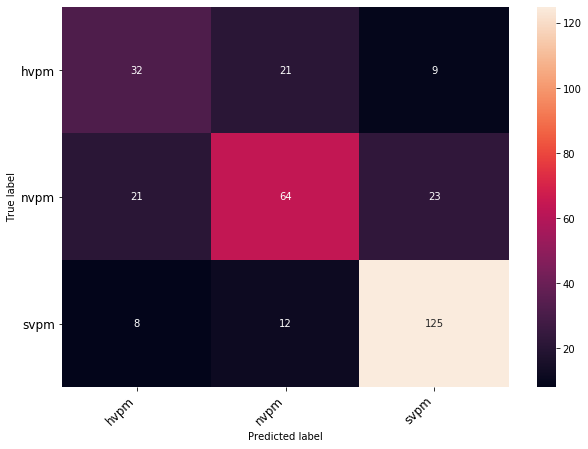

In [5]:
test_model(df, url_columns, target, test_size=0.3)

We can see that the baseline model that only takes into consideration URL-related features performs better than a random estimator would, reaching 70.2% in accuracy. However, we can see from the confusion matrix that it predicts many NVPM pages as SVPM or HVPM. In general we can see that the classifier is not good at distinguishing between HVPM and NVPM pages.